<a href="https://colab.research.google.com/github/roman-mikhaylov/ML__synergya/blob/main/ML_5_18_Milkhaylov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

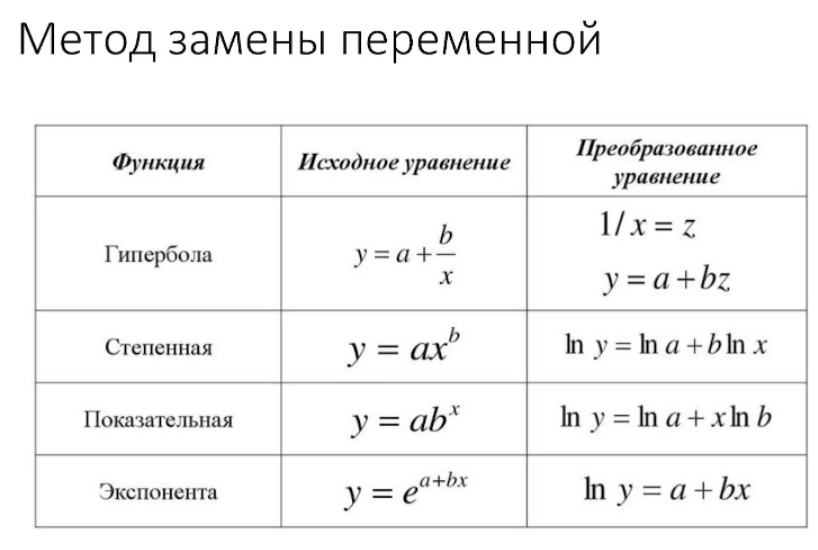

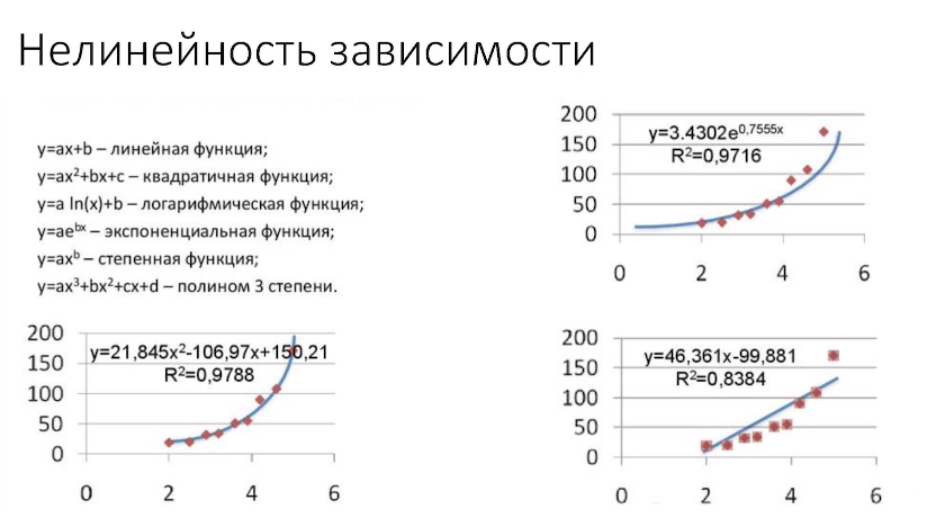

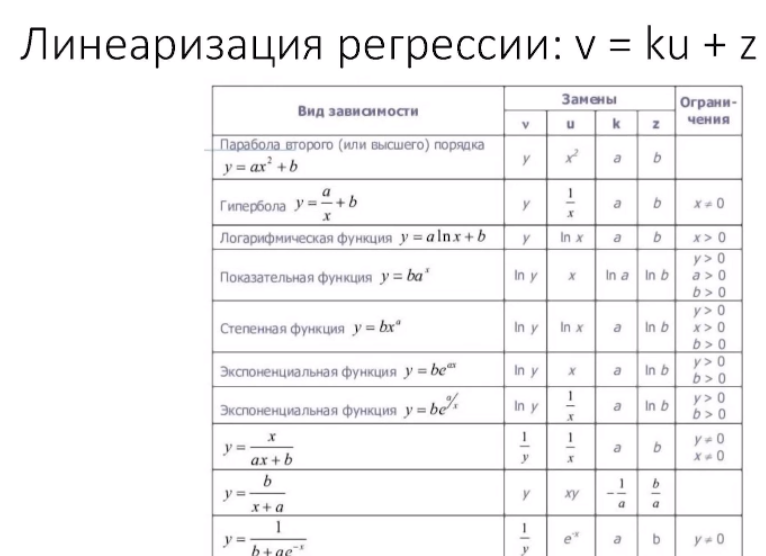

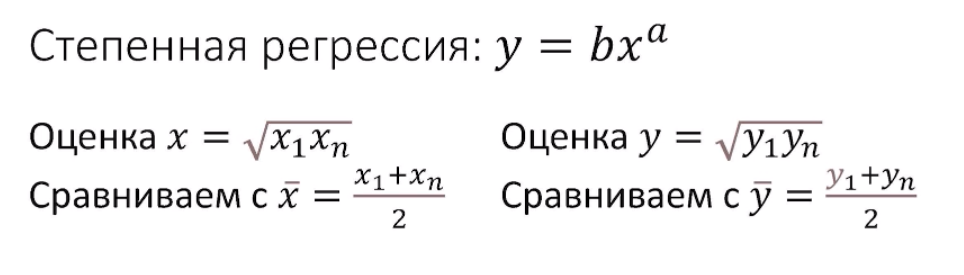

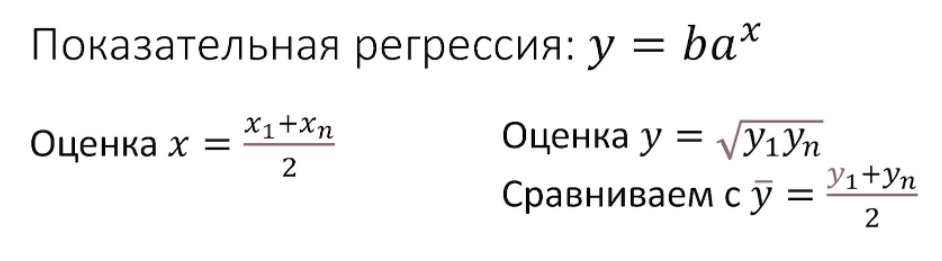

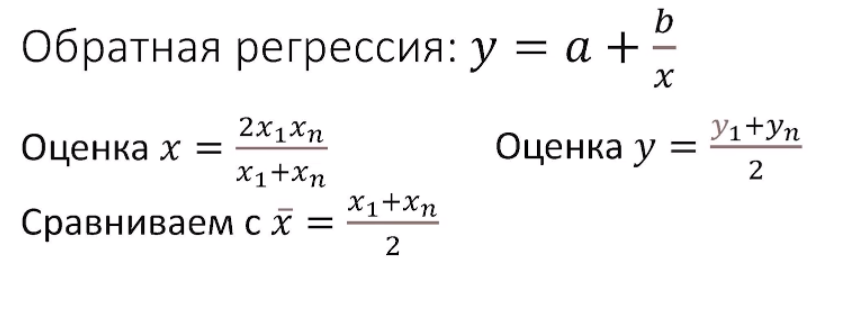

Линеризация

исследуем регрессии

In [ ]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot  as plt

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/energy_2.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5411 entries, 0 to 5410
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5411 non-null   int64  
 1   timestamp           5411 non-null   object 
 2   meter_reading       5411 non-null   float64
 3   air_temperature     5411 non-null   float64
 4   cloud_coverage      5411 non-null   float64
 5   dew_temperature     5411 non-null   float64
 6   precip_depth_1_hr   5411 non-null   float64
 7   sea_level_pressure  5383 non-null   float64
 8   wind_speed          5411 non-null   float64
 9   air_temperature1    5411 non-null   float64
 10  wind_direction_sin  5236 non-null   float64
 11  wind_direction_cos  5236 non-null   float64
 12  hour                5411 non-null   int64  
 13  day                 5411 non-null   int64  
dtypes: float64(10), int64(3), object(1)
memory usage: 592.0+ KB


In [ ]:
x = np.array(data.index).reshape(-1,1)
y = data['air_temperature']
y

0        8.3
1       12.8
2       20.6
3       21.7
4       31.1
        ... 
5406    22.8
5407    23.3
5408    23.3
5409    22.8
5410    20.6
Name: air_temperature, Length: 5411, dtype: float64

модель линейной регрессии

In [ ]:
def calculate_bic (y,y_pred, power):
  return len(y)*np.log(len(y)*mean_squared_error(y,y_pred)**2) + power*np.log(len(y))
def calculate_aic (y,y_pred, power):
  return len(y)*np.log(len(y)*mean_squared_error(y,y_pred)**2) + 2*power


In [ ]:
bics = [0]
aics = [0]
model = LinearRegression().fit(x,y)
print ('линейная регрессия R2: {0:.5}'.format(model.score(x,y)))
bics.append(calculate_bic(y, model.predict(x),1))
print ('BIC : {0:.5}'.format(bics[1]))
aics.append(calculate_aic(y, model.predict(x),1))
print ('AIC : {0:.5}'.format(aics[1]))

линейная регрессия R2: 0.32329
BIC : 7.7029e+04
AIC : 7.7023e+04


степенная регрессия

In [ ]:
x_ = pd.DataFrame({"x1": data.index})
for i in range (10):
  x_["x" + str(i +2)] = np.multiply(x_ ["x"+ str(i+1)], data.index)
  model_ = LinearRegression().fit(x_, y)
  aics.append(calculate_aic(y, model_.predict(x_),i+2))
  bics.append(calculate_bic(y, model_.predict(x_),i+2))
  print ('регрессия', (i+2),  'степени R2: {0:.5}'.format(model_.score(x_,y)),
         'BIC : {0:.5}'.format(bics[2+i]),
         'AIC : {0:.5}'.format(aics[2+i]))

регрессия 2 степени R2: 0.40447 BIC : 7.5655e+04 AIC : 7.5642e+04
регрессия 3 степени R2: 0.42867 BIC : 7.5214e+04 AIC : 7.5195e+04
регрессия 4 степени R2: 0.43584 BIC : 7.5086e+04 AIC : 7.506e+04
регрессия 5 степени R2: 0.43522 BIC : 7.5107e+04 AIC : 7.5074e+04
регрессия 6 степени R2: 0.43522 BIC : 7.5115e+04 AIC : 7.5076e+04
регрессия 7 степени R2: 0.43523 BIC : 7.5124e+04 AIC : 7.5078e+04
регрессия 8 степени R2: 0.43523 BIC : 7.5132e+04 AIC : 7.508e+04
регрессия 9 степени R2: 0.43548 BIC : 7.5136e+04 AIC : 7.5077e+04
регрессия 10 степени R2: 0.43562 BIC : 7.5142e+04 AIC : 7.5076e+04
регрессия 11 степени R2: 0.43566 BIC : 7.515e+04 AIC : 7.5077e+04


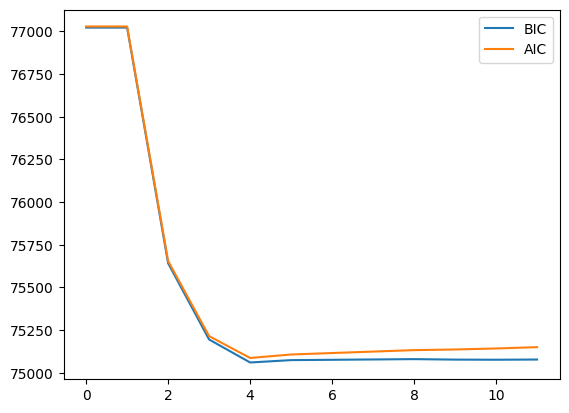

In [ ]:
aics[0]= max(aics)
bics[0] = max(bics)
plt.plot(aics)
plt.plot(bics)
plt.legend(["BIC", "AIC"])
plt.show()

приближение экспонентой y = be^ax
y=be^x ==> ln(y)=lnb+ax ==> z=lnx, c=lnb ==> z=at+b

In [ ]:
t = np.log(1+x)
z = np.log(1+y)

In [ ]:
model_e = LinearRegression().fit(t,z)
print ('экспотенциальна регрессия R2: {0:.5}'.format(model_e.score(t,z)))
print ('BIC {0:.5}'.format(calculate_bic(y,model_e.predict(t),1)))
print ('AIC {0:.5}'.format(calculate_aic(y,model_e.predict(t),1)))


экспотенциальна регрессия R2: 0.12345
BIC 1.1371e+05
AIC 1.137e+05


обратная регрессия

y=a+b/x  ==>  t=1/x ==> y=a+bt

In [ ]:
t = 1/(x+1)

In [ ]:
model_r = LinearRegression().fit(t,y)
print ('обратная регрессия R2: {0:.5}'.format(model_r.score(t,y)))
print ('BIC {0:.5}'.format(calculate_bic(y,model_r.predict(t),1)))
print ('AIC {0:.5}'.format(calculate_aic(y,model_r.predict(t),1)))

обратная регрессия R2: 0.0010606
BIC 8.1244e+04
AIC 8.1237e+04


**Задание спикера**

построить с помощью BIC 24 модели сепенной регресии от температуры по часа и проверить точность

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/energy_2.scv")

In [ ]:
x = np.array(data['air_temperature']).reshape(-1,1)
y = data['meter_reading']

In [ ]:
# функция ошибки RMSLE
def rmsle_err(y, y_pred):
  return ((np.log(1 + y) - np.log(1 + y_pred))**2).mean()**0.5

In [ ]:
ensamble = []
for h in range(24):
  data1 =  data.loc[data['hour'] == h]
  x = np.array(data1['air_temperature']).reshape(-1,1)
  y = data1['meter_reading']
  model1 = LinearRegression().fit(x, y)
  print ('RMSLE: {0:.5}'. format(rmsle_err(y, model1.predict(x))))
  ensamble.append(model_i1)
print(ensamble)

RMSLE: 0.20277


NameError: name 'model_is1' is not defined

In [ ]:
ensamble = []
for h in range(24):
  data1 =  data.loc[data['hour'] == h]
  x_ = pd.DataFrame({"x1": data1.index})
  for i in range (10):
    x_["x" + str(i +2)] = np.multiply(x_ ["x"+ str(i+1)], data.index)
    model_ = LinearRegression().fit(x_, y)
    bics.append(calculate_bic(y, model_.predict(x_),i+2))
    print ('регрессия', (i+2),  'степени R2: {0:.5}'.format(model_.score(x_,y)),
         'BIC : {0:.5}'.format(bics[2+i]))



ValueError: Found input variables with inconsistent numbers of samples: [5411, 225]